# Sales Performance & Customer Insights Analysis

This notebook analyzes retail sales data to uncover trends in category performance, monthly sales, top products, and regional sales distribution.


In [3]:
import pandas as pd

In [5]:
df = pd.read_csv('../data/Superstore.csv', encoding='latin1')
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,13-06-2013,17-06-2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [7]:
df.shape


(9994, 21)

In [9]:
df.columns


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [13]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')


In [15]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')


In [17]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     3974 non-null   datetime64[ns]
 3   Ship Date      3878 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [19]:
df['Year'] = df['Order Date'].dt.year


In [21]:
df['Month'] = df['Order Date'].dt.month


In [23]:
df[['Order Date', 'Year', 'Month']].head()


,Order Date,Year,Month
0,2013-09-11,2013.0,9.0
1,2013-09-11,2013.0,9.0
2,NaT,NaN,NaN
3,2012-11-10,2012.0,11.0
4,2012-11-10,2012.0,11.0


## Sales by Category


In [25]:
category_sales = df.groupby('Category')['Sales'].sum()
category_sales


Category
Furniture          741999.7953
Office Supplies    719047.0320
Technology         836154.0330
Name: Sales, dtype: float64

In [27]:
category_sales.sort_values(ascending=False)


Category
Technology         836154.0330
Furniture          741999.7953
Office Supplies    719047.0320
Name: Sales, dtype: float64

<Axes: title={'center': 'Sales by Category'}, xlabel='Category'>

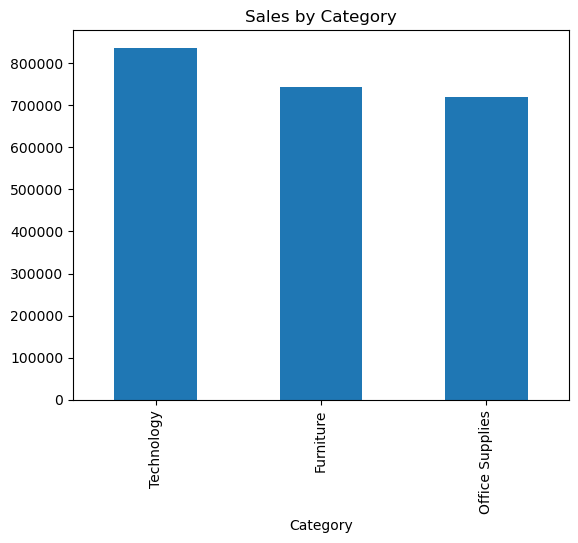

In [29]:
category_sales.sort_values(ascending=False).plot(kind='bar', title='Sales by Category')


## Monthly Sales Trend


In [31]:
monthly_sales = df.groupby('Month')['Sales'].sum()
monthly_sales


Month
1.0     71470.2572
2.0     92532.3740
3.0     93311.8796
4.0     75368.0000
5.0     71893.2540
6.0     55960.8810
7.0     54379.1368
8.0     94915.5305
9.0     82234.1036
10.0    55032.9850
11.0    69172.3135
12.0    69188.9217
Name: Sales, dtype: float64

<Axes: title={'center': 'Monthly Sales Trend'}, xlabel='Month'>

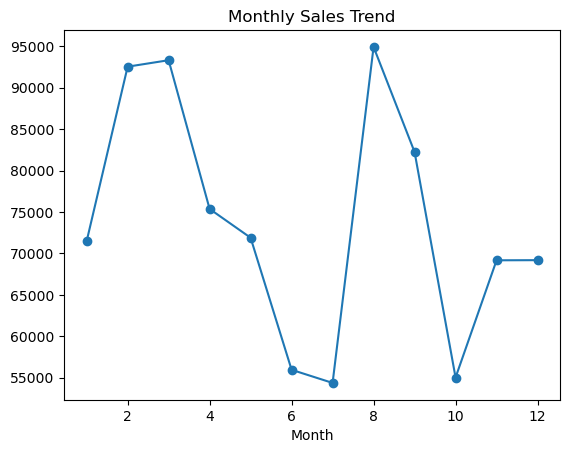

In [35]:
monthly_sales.sort_index().plot(kind='line', marker='o', title='Monthly Sales Trend')


## Top 10 Products by Sales


In [37]:
product_sales = df.groupby('Product Name')['Sales'].sum()
product_sales


Product Name
"While you Were Out" Message Book, One Form per Page                                                     25.228
#10 Gummed Flap White Envelopes, 100/Box                                                                 41.300
#10 Self-Seal White Envelopes                                                                           108.682
#10 White Business Envelopes,4 1/8 x 9 1/2                                                              488.904
#10- 4 1/8" x 9 1/2" Recycled Envelopes                                                                 286.672
                                                                                                         ...   
iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4     477.660
iOttie HLCRIO102 Car Mount                                                                              215.892
iOttie XL Car Mount                                                                        

In [39]:
top_10_products = product_sales.sort_values(ascending=False).head(10)
top_10_products


Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automatic Electric Letter Opener                                    17030.312
Name: Sales, dtype: float64

<Axes: title={'center': 'Top 10 Products by Sales'}, ylabel='Product Name'>

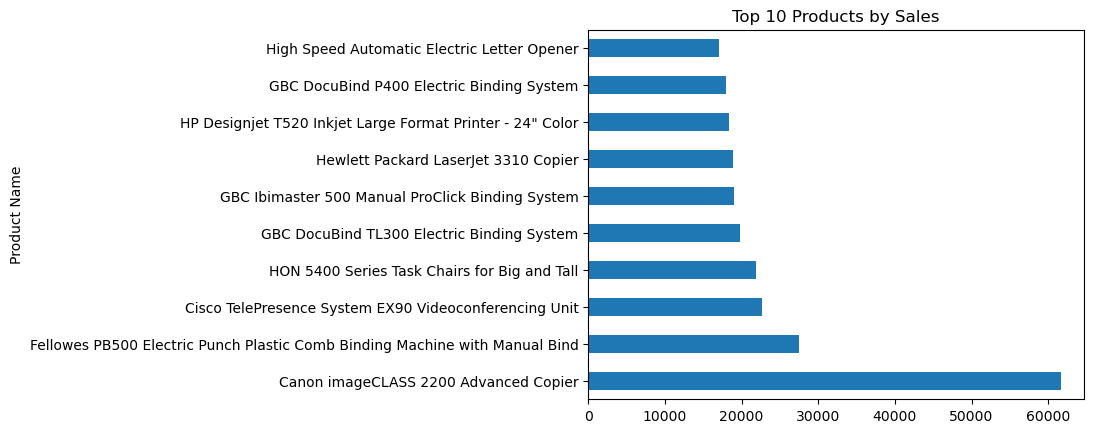

In [41]:
top_10_products.plot(kind='barh', title='Top 10 Products by Sales')


## Sales by Region


In [43]:
region_sales = df.groupby('Region')['Sales'].sum()
region_sales


Region
Central    501239.8908
East       678781.2400
South      391721.9050
West       725457.8245
Name: Sales, dtype: float64

In [45]:
region_sales.sort_values(ascending=False)


Region
West       725457.8245
East       678781.2400
Central    501239.8908
South      391721.9050
Name: Sales, dtype: float64

<Axes: title={'center': 'Sales by Region'}, xlabel='Region'>

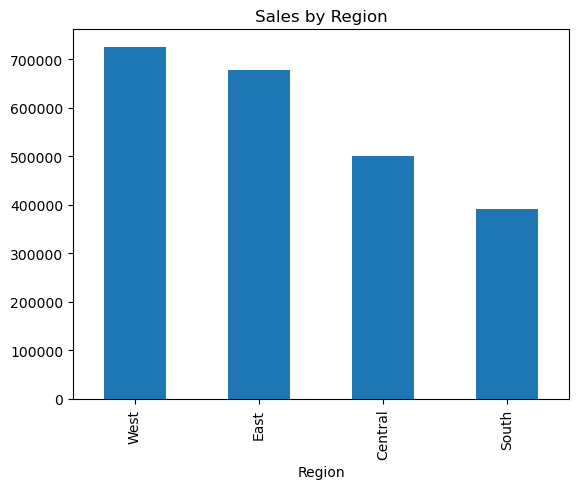

In [47]:
region_sales.sort_values(ascending=False).plot(kind='bar', title='Sales by Region')
